In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import convolve, butter, lfilter

## Two RC low-pass filters by cascade

In [16]:
# Cut-off Frequencies: 2.8 kHz and 3.2 kHz
#f_c1 = 2800  # Hz
#f_c2 = 3200  # Hz

f_c1 = 400  # Hz
f_c2 = 1000  # Hz

# Input and Output files
input_filename = "Audios/adele_ext1.wav"
output_filename = "Audios/adele_ext1_filtered_rc_cascade.wav"

# Reading audio file
try:
    fs, audio_data = wavfile.read(input_filename)
except FileNotFoundError:
    print(f"ERROR: File not found '{input_filename}'.")
    exit()

# Choose only one channel
if audio_data.ndim > 1:
    print(f"Audio with {audio_data.ndim} channels")
    signal = audio_data[:, 0] # Choose the first channel
else:
    signal = audio_data

N = len(signal)
print(f"Sampling rate (fs): {fs} Hz")
print(f"Signal lenght: {N} samples")
print(f"Duration: {N / fs:.2f} seconds")

#IMPLEMENTING RC LOW-PASS RC FILTERS

# Frequencies
frequencies = np.fft.fftfreq(N, 1/fs)

# Transfer function for filter 1 (f_c1 = 2.8 kHz)
T1 = 1 / (1 + 1j * (frequencies / f_c1))

# Transfer function for filter 2 (f_c1 = 3.2 kHz)
T2 = 1 / (1 + 1j * (frequencies / f_c2))

# Transfer function of the two filters by cascade
T_cascade = T1*T2

# Applying filters

signal_fft = np.fft.fft(signal) # FFT of the signal
filtered_signal_fft = signal_fft*T_cascade # Multiply the FFT of the signal by the total transfer function

filtered_signal = np.fft.ifft(filtered_signal_fft).real # Transform the filtered signal back to the time domain


# SAVING FILTERED AUDIO
dtype = audio_data.dtype
max_amplitude = np.iinfo(dtype).max
filtered_signal_normalized = (filtered_signal / np.max(np.abs(filtered_signal))) * max_amplitude # Normalize output signal

filtered_signal_int = filtered_signal_normalized.astype(dtype) #Converting to correct data type

wavfile.write(output_filename, fs, filtered_signal_int) # To save output audio

# Shifting and normalizing arrays just for plotting
freqs_shifted = np.fft.fftshift(frequencies)
T_cascade_shifted = np.fft.fftshift(T_cascade)
signal_fft_shifted = np.fft.fftshift(signal_fft)
filtered_signal_fft_shifted = np.fft.fftshift(filtered_signal_fft)

signal_fft_shifted_norm = signal_fft_shifted/np.max(signal_fft_shifted)
filtered_signal_fft_shifted_norm = filtered_signal_fft_shifted/np.max(filtered_signal_fft_shifted)


Audio with 2 channels
Sampling rate (fs): 48000 Hz
Signal lenght: 3093440 samples
Duration: 64.45 seconds


/tmp/ipykernel_29780/2359691618.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


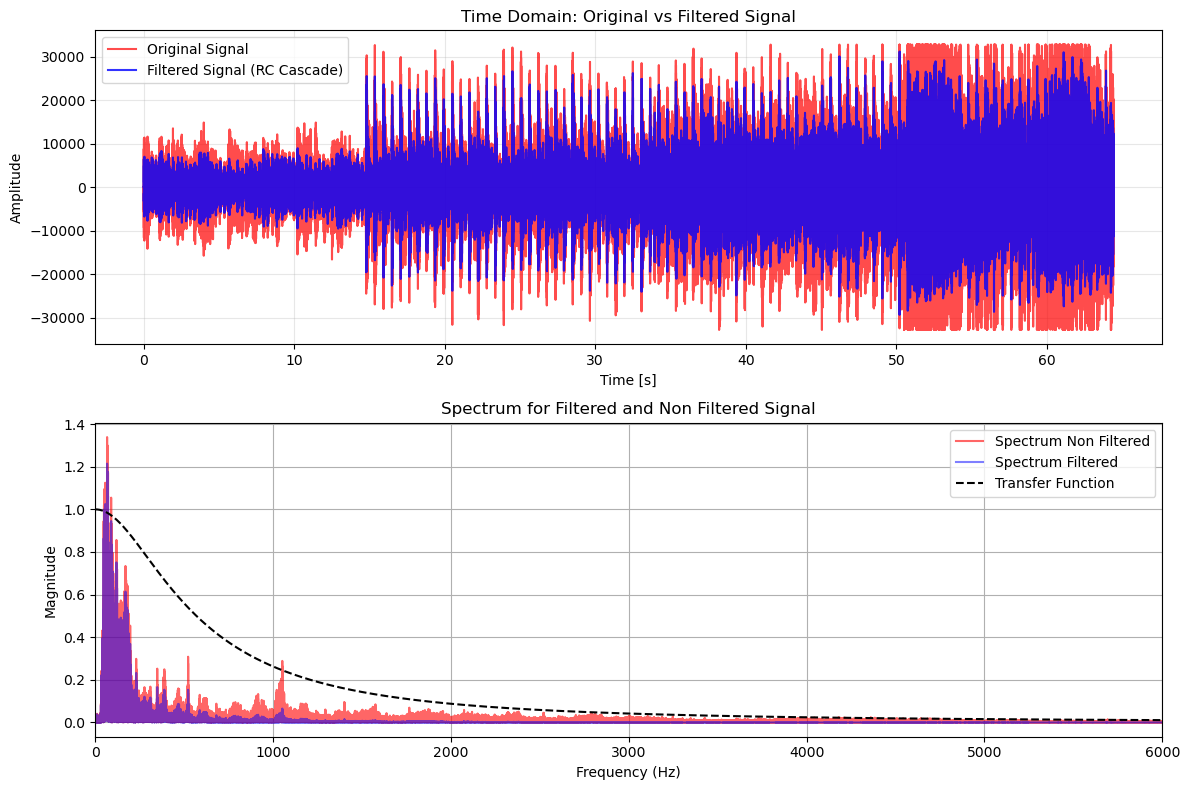

In [18]:
# PLOTTING
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)

time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.plot(time, signal, label='Original Signal', color='red', alpha=0.7)
plt.plot(time, filtered_signal, label='Filtered Signal (RC Cascade)', color='blue', alpha=0.8)
plt.title('Time Domain: Original vs Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)

plt.plot(freqs_shifted, np.abs(signal_fft_shifted_norm), label = 'Spectrum Non Filtered', color='red', alpha = 0.6)
plt.plot(freqs_shifted, np.abs(filtered_signal_fft_shifted_norm), label = 'Spectrum Filtered', color='blue', alpha = 0.5)
plt.plot(freqs_shifted, np.abs(T_cascade_shifted), label = 'Transfer Function', color = 'black', linestyle = '--')
plt.title('Spectrum for Filtered and Non Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 6000)
#plt.ylim(0, 0.02)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('adele_spectrum_comparison')
plt.show()

## Another two low pass

In [ ]:
# Cut-off Frequencies: 2.8 kHz and 3.2 kHz
f_c1 = 2500  # Hz
f_c2 = 3000  # Hz

# Input and Output files
input_filename = "Audios/rezanoisy.wav"
output_filename = "Audios/rezanoisy_filtered_rc_cascade.wav"

# Reading audio file
try:
    fs, audio_data = wavfile.read(input_filename)
except FileNotFoundError:
    print(f"ERROR: File not found '{input_filename}'.")
    exit()

# Choose only one channel
if audio_data.ndim > 1:
    print(f"Audio with {audio_data.ndim} channels")
    signal = audio_data[:, 0] # Choose the first channel
else:
    signal = audio_data

N = len(signal)
print(f"Sampling rate (fs): {fs} Hz")
print(f"Signal lenght: {N} samples")
print(f"Duration: {N / fs:.2f} seconds")

#IMPLEMENTING RC LOW-PASS RC FILTERS

# Frequencies
frequencies = np.fft.fftfreq(N, 1/fs)

# Transfer function for filter 1 (f_c1 = 2.8 kHz)
T1 = 1 / (1 + 1j * (frequencies / f_c1))

# Transfer function for filter 2 (f_c1 = 3.2 kHz)
T2 = 1 / (1 + 1j * (frequencies / f_c2))

# Transfer function of the two filters by cascade
T_cascade = T1

# Applying filters

signal_fft = np.fft.fft(signal) # FFT of the signal
filtered_signal_fft = signal_fft*T_cascade # Multiply the FFT of the signal by the total transfer function

filtered_signal = np.fft.ifft(filtered_signal_fft).real # Transform the filtered signal back to the time domain


# SAVING FILTERED AUDIO
dtype = audio_data.dtype
max_amplitude = np.iinfo(dtype).max
filtered_signal_normalized = (filtered_signal / np.max(np.abs(filtered_signal))) * max_amplitude # Normalize output signal

filtered_signal_int = filtered_signal_normalized.astype(dtype) #Converting to correct data type

#wavfile.write(output_filename, fs, filtered_signal_int) # To save output audio

# Shifting and normalizing arrays just for plotting
freqs_shifted = np.fft.fftshift(frequencies)
T_cascade_shifted = np.fft.fftshift(T_cascade)
signal_fft_shifted = np.fft.fftshift(signal_fft)
filtered_signal_fft_shifted = np.fft.fftshift(filtered_signal_fft)

signal_fft_shifted_norm = signal_fft_shifted/np.max(signal_fft_shifted)
filtered_signal_fft_shifted_norm = filtered_signal_fft_shifted/np.max(filtered_signal_fft_shifted)


Sampling rate (fs): 44100 Hz
Signal lenght: 400320 samples
Duration: 9.08 seconds


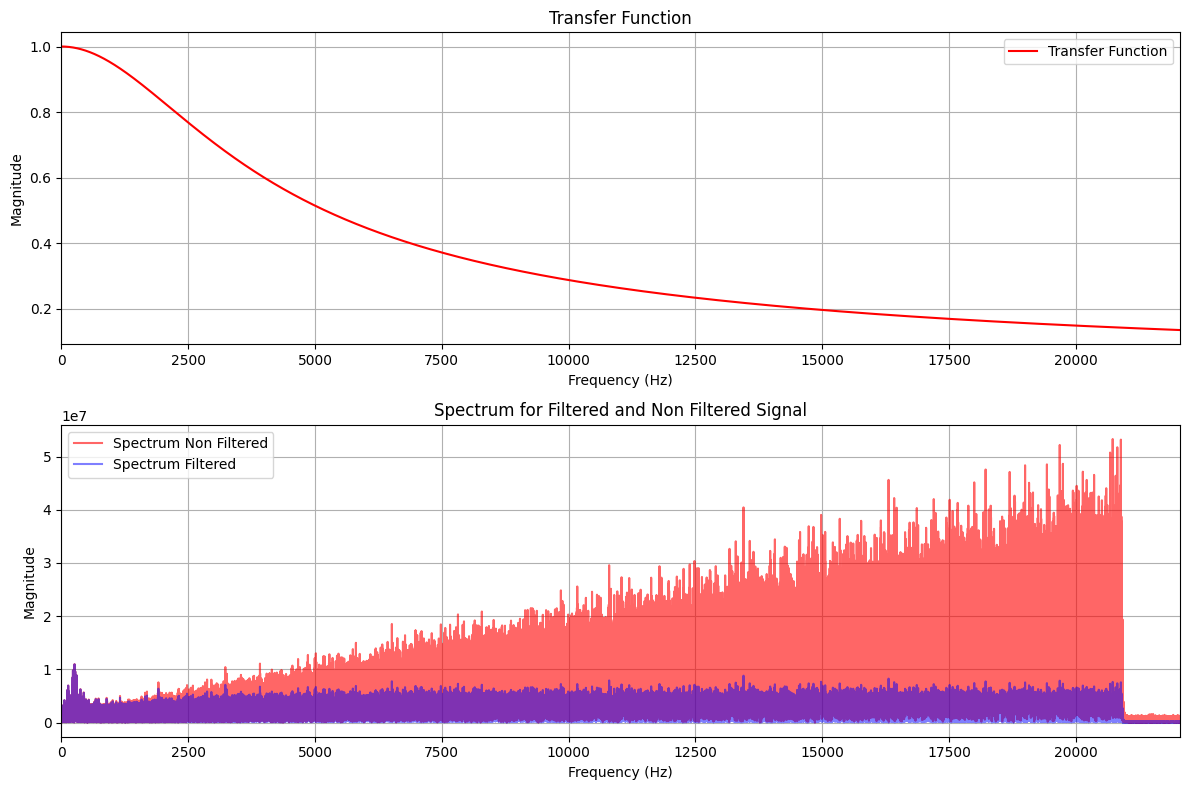

In [266]:
# PLOTTING
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)

plt.plot(freqs_shifted, np.abs(T_cascade_shifted), label = 'Transfer Function', color = 'red')
plt.title('Transfer Function')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)

plt.plot(freqs_shifted, np.abs(signal_fft_shifted), label = 'Spectrum Non Filtered', color='red', alpha = 0.6)
plt.plot(freqs_shifted, np.abs(filtered_signal_fft_shifted), label = 'Spectrum Filtered', color='blue', alpha = 0.5)
plt.title('Spectrum for Filtered and Non Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)
#plt.ylim(0, 0.02)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## RC LOW AND HIGH PASS IN SERIES

In [ ]:
# Cut-off Frequencies: 2.8 kHz and 3.2 kHz
f_c1 = 100  # Hz
f_c2 = 4000  # Hz

# Input and Output files
input_filename = "Audios/rezanoisy.wav"
output_filename = "Audios/rezanoisy_filtered_rc_cascade.wav"

# Reading audio file
try:
    fs, audio_data = wavfile.read(input_filename)
except FileNotFoundError:
    print(f"ERROR: File not found '{input_filename}'.")
    exit()

# Choose only one channel
if audio_data.ndim > 1:
    print(f"Audio with {audio_data.ndim} channels")
    signal = audio_data[:, 0] # Choose the first channel
else:
    signal = audio_data

N = len(signal)
print(f"Sampling rate (fs): {fs} Hz")
print(f"Signal lenght: {N} samples")
print(f"Duration: {N / fs:.2f} seconds")

#IMPLEMENTING RC LOW-PASS RC FILTERS

# Frequencies
frequencies = np.fft.fftfreq(N, 1/fs)

# Transfer function for filter 1 (f_c1 = 300 Hz)
T1 = (1j*frequencies/f_c1) / (1 + 1j * (frequencies / f_c1))

# Transfer function for filter 2 (f_c1 = 3400 Hz)
T2 = 1 / (1 + 1j * (frequencies / f_c2))

# Transfer function of the two filters by cascade
T_cascade = T1*T2

# Applying filters

signal_fft = np.fft.fft(signal) # FFT of the signal
filtered_signal_fft = signal_fft*T_cascade # Multiply the FFT of the signal by the total transfer function

filtered_signal = np.fft.ifft(filtered_signal_fft).real # Transform the filtered signal back to the time domain


# SAVING FILTERED AUDIO
dtype = audio_data.dtype
max_amplitude = np.iinfo(dtype).max
filtered_signal_normalized = (filtered_signal / np.max(np.abs(filtered_signal))) * max_amplitude # Normalize output signal

filtered_signal_int = filtered_signal_normalized.astype(dtype) #Converting to correct data type

#wavfile.write(output_filename, fs, filtered_signal_int) # To save output audio

# Shifting and normalizing arrays just for plotting
freqs_shifted = np.fft.fftshift(frequencies)
T_cascade_shifted = np.fft.fftshift(T_cascade)
signal_fft_shifted = np.fft.fftshift(signal_fft)
filtered_signal_fft_shifted = np.fft.fftshift(filtered_signal_fft)

signal_fft_shifted_norm = signal_fft_shifted/np.max(signal_fft_shifted)
filtered_signal_fft_shifted_norm = filtered_signal_fft_shifted/np.max(filtered_signal_fft_shifted)


Sampling rate (fs): 44100 Hz
Signal lenght: 400320 samples
Duration: 9.08 seconds


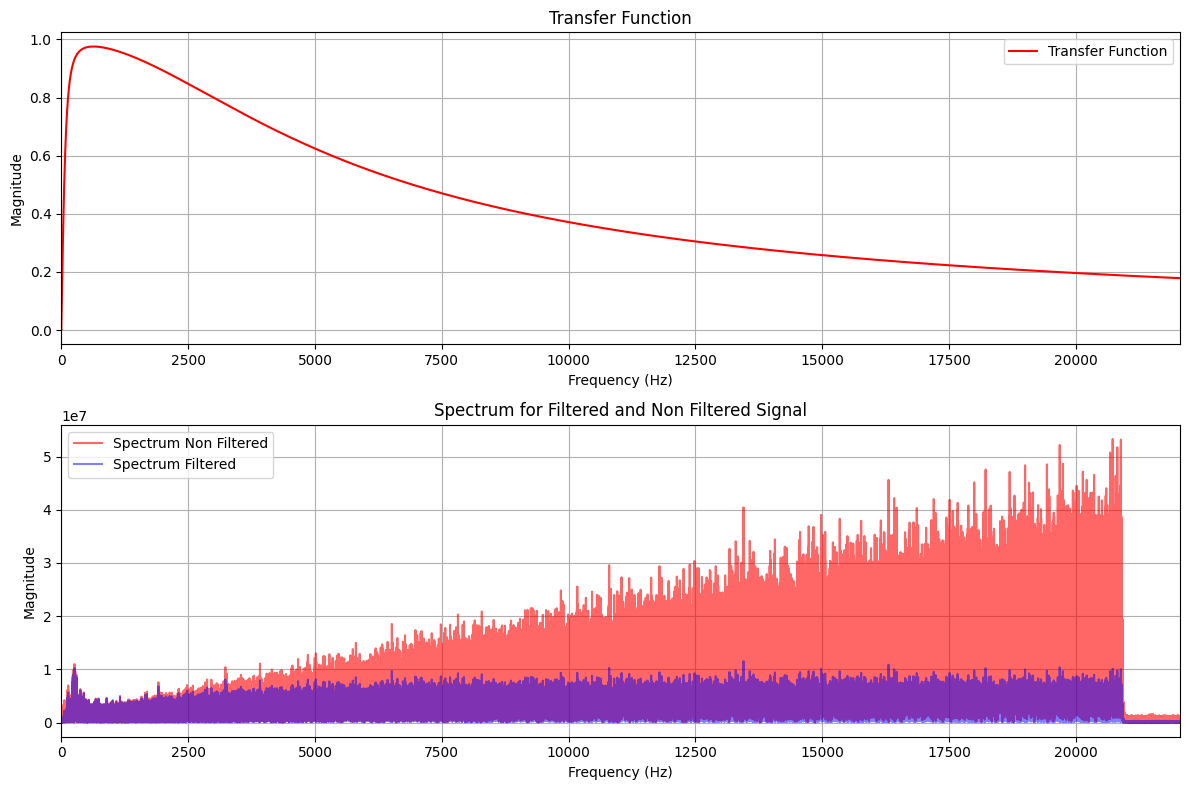

In [45]:
# PLOTTING
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)

plt.plot(freqs_shifted, np.abs(T_cascade_shifted), label = 'Transfer Function', color = 'red')
plt.title('Transfer Function')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)

plt.plot(freqs_shifted, np.abs(signal_fft_shifted), label = 'Spectrum Non Filtered', color='red', alpha = 0.6)
plt.plot(freqs_shifted, np.abs(filtered_signal_fft_shifted), label = 'Spectrum Filtered', color='blue', alpha = 0.5)
plt.title('Spectrum for Filtered and Non Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)
#plt.ylim(0, 0.02)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## RLC Band-Pass filter

In [16]:
# Cut-off Frequencie and band width
f_c1 = 400  # Hz
Q = 1  # Hz

# Input and Output files
input_filename = "Audios/rezanoisy_filtered_RLC_BandPass.wav"
output_filename = "Audios/rezanoisy_filtered_RLC_BandPass.wav"

# Reading audio file
try:
    fs, audio_data = wavfile.read(input_filename)
except FileNotFoundError:
    print(f"ERROR: File not found '{input_filename}'.")
    exit()

# Choose only one channel
if audio_data.ndim > 1:
    print(f"Audio with {audio_data.ndim} channels")
    signal = audio_data[:, 0] # Choose the first channel
else:
    signal = audio_data

N = len(signal)
print(f"Sampling rate (fs): {fs} Hz")
print(f"Signal lenght: {N} samples")
print(f"Duration: {N / fs:.2f} seconds")

#IMPLEMENTING RC LOW-PASS RC FILTERS

# Frequencies
frequencies = np.fft.fftfreq(N, 1/fs)
non_zero_mask = frequencies != 0

# Transfer function
T1 = np.zeros_like(frequencies, dtype=complex)
T1[non_zero_mask] = 1 / (1 - 1j*(f_c1/(Q*frequencies[non_zero_mask]))*(1 - ((frequencies[non_zero_mask]**2)/(f_c1**2))))


# Transfer function of the two filters by cascade
T_cascade = T1

# Applying filters

signal_fft = np.fft.fft(signal) # FFT of the signal
filtered_signal_fft = signal_fft*T_cascade # Multiply the FFT of the signal by the total transfer function

filtered_signal = np.fft.ifft(filtered_signal_fft).real # Transform the filtered signal back to the time domain


# SAVING FILTERED AUDIO
dtype = audio_data.dtype
max_amplitude = np.iinfo(dtype).max
filtered_signal_normalized = (filtered_signal / np.max(np.abs(filtered_signal))) * max_amplitude # Normalize output signal

filtered_signal_int = filtered_signal_normalized.astype(dtype) #Converting to correct data type

wavfile.write(output_filename, fs, filtered_signal_int) # To save output audio

# Shifting and normalizing arrays just for plotting
freqs_shifted = np.fft.fftshift(frequencies)
T_cascade_shifted = np.fft.fftshift(T_cascade)
signal_fft_shifted = np.fft.fftshift(signal_fft)
filtered_signal_fft_shifted = np.fft.fftshift(filtered_signal_fft)

signal_fft_shifted_norm = signal_fft_shifted/np.max(signal_fft_shifted)
filtered_signal_fft_shifted_norm = filtered_signal_fft_shifted/np.max(filtered_signal_fft_shifted)


Sampling rate (fs): 44100 Hz
Signal lenght: 400320 samples
Duration: 9.08 seconds


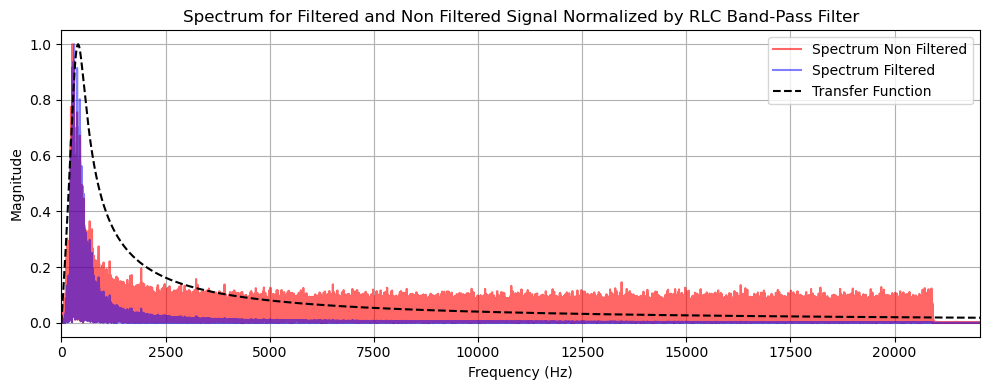

In [20]:
# PLOTTING
plt.figure(figsize=(10, 4))

# plt.subplot(2, 1, 1)

# plt.plot(freqs_shifted, np.abs(T_cascade_shifted), label = 'Transfer Function', color = 'red')
# plt.title('Transfer Function')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.xlim(0, fs/2)
# plt.grid(True)
# plt.legend()


#plt.subplot(2, 1, 2)

plt.plot(freqs_shifted, np.abs(signal_fft_shifted_norm), label = 'Spectrum Non Filtered', color='red', alpha = 0.6)
plt.plot(freqs_shifted, np.abs(filtered_signal_fft_shifted_norm), label = 'Spectrum Filtered', color='blue', alpha = 0.5)
plt.plot(freqs_shifted, np.abs(T_cascade_shifted), label = 'Transfer Function', color = 'black', linestyle = '--')
plt.title('Spectrum for Filtered and Non Filtered Signal Normalized by RLC Band-Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)
#plt.ylim(0, 0.02)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('bandpass_result')
plt.show()

## RLC Notch Filter

In [11]:
# Cut-off Frequencie and band width
f_c1 = 2206 # Hz
Q = 1  # Hz

# Input and Output files
input_filename = "Audios/rezanoisy2.wav"
output_filename = "Audios/rezanoisy2_filtered_RLC_Notch.wav"

# Reading audio file
try:
    fs, audio_data = wavfile.read(input_filename)
except FileNotFoundError:
    print(f"ERROR: File not found '{input_filename}'.")
    exit()

# Choose only one channel
if audio_data.ndim > 1:
    print(f"Audio with {audio_data.ndim} channels")
    signal = audio_data[:, 0] # Choose the first channel
else:
    signal = audio_data

N = len(signal)
print(f"Sampling rate (fs): {fs} Hz")
print(f"Signal lenght: {N} samples")
print(f"Duration: {N / fs:.2f} seconds")

#IMPLEMENTING RC LOW-PASS RC FILTERS

# Frequencies
frequencies = np.fft.fftfreq(N, 1/fs)
non_zero_mask = frequencies != 0

# Transfer function
T1 = np.zeros_like(frequencies, dtype=complex)
T1[non_zero_mask] = (1 - (frequencies[non_zero_mask]**2)/(f_c1**2)) / (1 - (frequencies[non_zero_mask]**2)/(f_c1**2) + 1j*(frequencies[non_zero_mask])/(f_c1*Q))


# Transfer function of the two filters by cascade
T_cascade = T1

# Applying filters

signal_fft = np.fft.fft(signal) # FFT of the signal
filtered_signal_fft = signal_fft*T_cascade # Multiply the FFT of the signal by the total transfer function

filtered_signal = np.fft.ifft(filtered_signal_fft).real # Transform the filtered signal back to the time domain


# SAVING FILTERED AUDIO
dtype = audio_data.dtype
max_amplitude = np.iinfo(dtype).max
filtered_signal_normalized = (filtered_signal / np.max(np.abs(filtered_signal))) * max_amplitude # Normalize output signal

filtered_signal_int = filtered_signal_normalized.astype(dtype) #Converting to correct data type

wavfile.write(output_filename, fs, filtered_signal_int) # To save output audio

# Shifting and normalizing arrays just for plotting
freqs_shifted = np.fft.fftshift(frequencies)
T_cascade_shifted = np.fft.fftshift(T_cascade)
signal_fft_shifted = np.fft.fftshift(signal_fft)
filtered_signal_fft_shifted = np.fft.fftshift(filtered_signal_fft)

signal_fft_shifted_norm = signal_fft_shifted/np.max(signal_fft_shifted)
filtered_signal_fft_shifted_norm = filtered_signal_fft_shifted/np.max(filtered_signal_fft_shifted)


Sampling rate (fs): 44100 Hz
Signal lenght: 400320 samples
Duration: 9.08 seconds


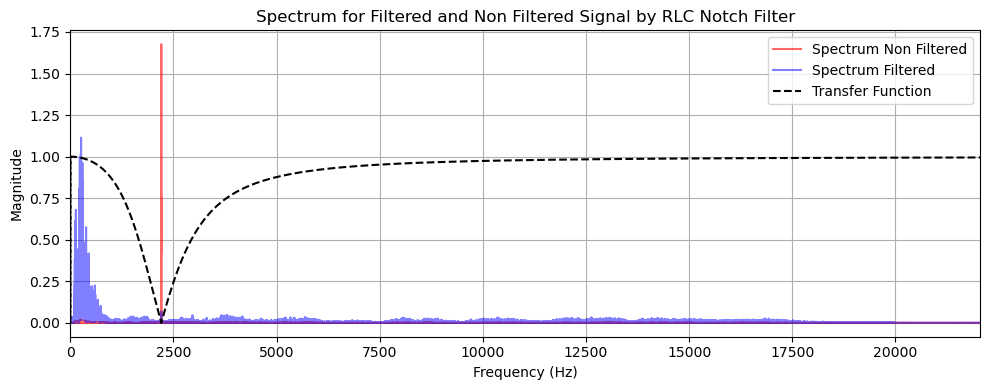

In [13]:
# PLOTTING
plt.figure(figsize=(10, 4))

# plt.subplot(2, 1, 1)

# plt.plot(freqs_shifted, np.abs(T_cascade_shifted), label = 'Transfer Function', color = 'red')
# plt.title('Transfer Function')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.xlim(0, fs/2)
# plt.grid(True)
# plt.legend()


#plt.subplot(2, 1, 2)

plt.plot(freqs_shifted, np.abs(signal_fft_shifted_norm), label = 'Spectrum Non Filtered', color='red', alpha = 0.6)
plt.plot(freqs_shifted, np.abs(filtered_signal_fft_shifted_norm), label = 'Spectrum Filtered', color='blue', alpha = 0.5)
plt.plot(freqs_shifted, np.abs(T_cascade_shifted), label = 'Transfer Function', color = 'black', linestyle = '--')

plt.title('Spectrum for Filtered and Non Filtered Signal by RLC Notch Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)
#plt.ylim(0, 1.5*1e7)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('notch_result')
plt.show()